# Visualize the different datasets

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pyproj
from rasterio.transform import Affine

import matplotlib.pyplot as plt
import matplotlib.colors as cl
from matplotlib.ticker import FormatStrFormatter

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.geodesic as cgeo
crs = ccrs.PlateCarree()
import cmocean.cm as cm

from xgcm import Grid
from xhistogram.xarray import histogram
import warnings
warnings.filterwarnings("ignore")

import os
from glob import glob

import m2lib22.box as box
import m2lib22.aviso as aviso
import m2lib22.cstes as cstes
import m2lib22.diagnosis as diag
import m2lib22.erastar as eras
import m2lib22.stress_to_windterm as stw

from m2lib22.cstes import labels, zarr_dir

In [2]:
if True:
    from dask.distributed import Client
    from dask_jobqueue import PBSCluster
    #cluster = PBSCluster(cores=56, processes=28, walltime='04:00:00')
    #cluster = PBSCluster(cores=7, processes=7, walltime='04:00:00')
    cluster = PBSCluster(cores=7, processes=7, walltime='04:00:00')
    w = cluster.scale(jobs=1)
else:
    from dask.distributed import Client, LocalCluster
    cluster = LocalCluster()

client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: http://10.148.1.57:8787/status,
Dashboard: http://10.148.1.57:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.1.57:50341,Workers: 0
Dashboard: http://10.148.1.57:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [63]:
l =labels[6]

____________
# ds_data

In [64]:
ds_data = xr.open_zarr(zarr_dir+'/'+l+'.zarr')

In [65]:
ds_data

<xarray.Dataset>
Dimensions:                                (obs: 49972, alti_time: 21,
                                            alti_time_mid: 20, box_y: 40,
                                            box_x: 80, site_obs: 1489)
Coordinates: (12/19)
    alti_lat                               (obs, alti_time) float64 dask.array<chunksize=(500, 21), meta=np.ndarray>
    alti_lon                               (obs, alti_time) float64 dask.array<chunksize=(500, 21), meta=np.ndarray>
  * alti_time                              (alti_time) int64 0 1 2 ... 18 19 20
    alti_time_                             (obs, alti_time) datetime64[ns] dask.array<chunksize=(12493, 6), meta=np.ndarray>
  * alti_time_mid                          (alti_time_mid) float64 0.5 ... 19.5
    alti_x                                 (obs, alti_time) float64 dask.array<chunksize=(500, 21), meta=np.ndarray>
    ...                                     ...
    drifter_time                           (obs, site_obs) datetime64[ns] dask.array<chunksize=(3124, 94), meta=np.ndarray>
    drifter_x                              (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_y                              (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    lat                                    (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    lon                                    (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    time                                   (obs) datetime64[ns] dask.array<chunksize=(24986,), meta=np.ndarray>
Dimensions without coordinates: obs, site_obs
Data variables: (12/76)
    __site_id                              (obs) object dask.array<chunksize=(24986,), meta=np.ndarray>
    __site_matchup_indice                  (obs) int32 dask.array<chunksize=(500,), meta=np.ndarray>
    __site_name                            (obs) object dask.array<chunksize=(24986,), meta=np.ndarray>
    alti___distance                        (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    alti___source                          (obs) object dask.array<chunksize=(24986,), meta=np.ndarray>
    alti___source_center_index             (obs) object dask.array<chunksize=(24986,), meta=np.ndarray>
    ...                                     ...
    drifter_typedeath                      (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_ve                             (obs, site_obs) float32 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_vn                             (obs, site_obs) float32 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_vx                             (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_vy                             (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    f                                      (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
Attributes:
    __id:                   PEACHI-L2-SLA-Sentinel-3_A__gps
    __time_coverage_end:    2018-09-01T00:00:00
    __time_coverage_start:  2018-01-01T00:00:00

____________
# ds_stress

In [66]:
ds_stress = xr.open_zarr(zarr_dir+'/erastar_'+l+'.zarr')
ds_stress= ds_stress.rename({v:v.replace('box_matchup','box') for v in ds_stress if 'box_matchup' in v})
ds_stress = ds_stress.rename({v:v.replace('tauu','taue') for v in ds_stress if 'tauu' in v}).rename({v:v.replace('tauv','taun') for v in ds_stress if 'tauv' in v})
__site_matchup_indice=ds_data.__site_matchup_indice.drop(['lon', 'lat']).compute()
e5_drifter_matchup_taue = ds_stress.e5_traj_taue.isel(site_obs = __site_matchup_indice)
e5_drifter_matchup_taun = ds_stress.e5_traj_taun.isel(site_obs = __site_matchup_indice)
es_drifter_matchup_taue = ds_stress.es_traj_taue.isel(site_obs = __site_matchup_indice)
es_drifter_matchup_taun = ds_stress.es_traj_taun.isel(site_obs = __site_matchup_indice)
ds_stress['e5_drifter_matchup_taue'] = e5_drifter_matchup_taue
ds_stress['e5_drifter_matchup_taun'] = e5_drifter_matchup_taun
ds_stress['es_drifter_matchup_taue'] = es_drifter_matchup_taue
ds_stress['es_drifter_matchup_taun'] = es_drifter_matchup_taun

ds_stress.e5_alti_matchup_taue.attrs={'long_name':"era5 eastward wind stress interpolated on the altimeter's matchup", 'units':'Pa'}
ds_stress.e5_alti_matchup_taun.attrs={'long_name':"era5 northward wind stress interpolated on the altimeter's matchup", 'units':'Pa'}

ds_stress.e5_drifter_matchup_taue.attrs={'long_name':"era5 eastward wind stress interpolated on the drifter's matchup", 'units':'Pa'}
ds_stress.e5_drifter_matchup_taun.attrs={'long_name':"era5 northward wind stress interpolated on the drifter's matchup", 'units':'Pa'}

ds_stress.e5_box_taue.attrs={'long_name':"era5 eastward wind stress interpolated on the box at the matchup time or for several times (depending on the dimension)", 'units':'Pa'}
ds_stress.e5_box_taun.attrs={'long_name':"era5 northward wind stress interpolated on the box at the matchup time or for several times (depending on the dimension)", 'units':'Pa'}

ds_stress.e5_drifter_temp_taue.attrs={'long_name':"era5 eastward wind stress interpolated on the drifter's matchup position for several times (static but temporal variation)", 'units':'Pa'}
ds_stress.e5_drifter_temp_taun.attrs={'long_name':"era5 northward wind stress interpolated on the drifter's matchup position for several times (static but temporal variation)", 'units':'Pa'}

ds_stress.e5_traj_taue.attrs={'long_name':"era5 eastward wind stress interpolated on the drifter's trajectory", 'units':'Pa'}
ds_stress.e5_traj_taun.attrs={'long_name':"era5 northward wind stress interpolated on the drifter's trajectory", 'units':'Pa'}


ds_stress.es_alti_matchup_taue.attrs={'long_name':"erastar eastward wind stress interpolated on the altimeter's matchup", 'units':'Pa'}
ds_stress.es_alti_matchup_taun.attrs={'long_name':"erastar northward wind stress interpolated on the altimeter's matchup", 'units':'Pa'}

ds_stress.es_drifter_matchup_taue.attrs={'long_name':"erastar eastward wind stress interpolated on the drifter's matchup", 'units':'Pa'}
ds_stress.es_drifter_matchup_taun.attrs={'long_name':"erastar northward wind stress interpolated on the drifter's matchup", 'units':'Pa'}

ds_stress.es_box_taue.attrs={'long_name':"erastar eastward wind stress interpolated on the box at the matchup time", 'units':'Pa'}
ds_stress.es_box_taun.attrs={'long_name':"erastar northward wind stress interpolated on the box at the matchup time", 'units':'Pa'}

ds_stress.es_drifter_temp_taue.attrs={'long_name':"erastar eastward wind stress interpolated on the drifter's matchup position for several times (static but temporal variation)", 'units':'Pa'}
ds_stress.es_drifter_temp_taun.attrs={'long_name':"erastar northward wind stress interpolated on the drifter's matchup position for several times (static but temporal variation)", 'units':'Pa'}

ds_stress.es_traj_taue.attrs={'long_name':"erastar eastward wind stress interpolated on the drifter's trajectory", 'units':'Pa'}
ds_stress.es_traj_taun.attrs={'long_name':"erastar northward wind stress interpolated on the drifter's trajectory", 'units':'Pa'}

ds_stress.drifter_x.attrs={'description':"drifter's along track direction x position on the box", "units":"m"}
ds_stress.drifter_y.attrs={'description':"drifter's cross track direction y position on the box", "units":"m"}
ds_stress.drifter_time.attrs={'description':"drifter's trajectory time measurements"}
ds_stress.box_x.attrs={'description':"along track direction x coordinate of the box", "units":"m"}
ds_stress.box_y.attrs={'description':"cross track direction y coordinate of the box", "units":"m"}

ds_stress                           

<xarray.Dataset>
Dimensions:                  (box_x: 80, box_y: 40, obs: 49972, site_obs: 1489,
                              es_time: 25)
Coordinates:
  * box_x                    (box_x) float64 -2e+05 -1.95e+05 ... 1.95e+05
  * box_y                    (box_y) float64 -1e+05 -9.5e+04 ... 9e+04 9.5e+04
    es_time_                 (obs, es_time) datetime64[ns] dask.array<chunksize=(12493, 7), meta=np.ndarray>
    time                     (obs) datetime64[ns] dask.array<chunksize=(24986,), meta=np.ndarray>
Dimensions without coordinates: obs, site_obs, es_time
Data variables: (12/23)
    drifter_time             (obs, site_obs) datetime64[ns] dask.array<chunksize=(3124, 94), meta=np.ndarray>
    drifter_x                (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_y                (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    e5_alti_matchup_taue     (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    e5_alti_matchup_taun     (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    e5_box_taue              (obs, box_y, box_x) float64 dask.array<chunksize=(500, 40, 80), meta=np.ndarray>
    ...                       ...
    es_traj_taue             (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    es_traj_taun             (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    e5_drifter_matchup_taue  (obs) float64 dask.array<chunksize=(49972,), meta=np.ndarray>
    e5_drifter_matchup_taun  (obs) float64 dask.array<chunksize=(49972,), meta=np.ndarray>
    es_drifter_matchup_taue  (obs) float64 dask.array<chunksize=(49972,), meta=np.ndarray>
    es_drifter_matchup_taun  (obs) float64 dask.array<chunksize=(49972,), meta=np.ndarray>
Attributes: (12/55)
    Conventions:                 CF-1.7, ACDD-1.3, ISO 8601
    Metadata_Conventions:        Climate and Forecast (CF) 1.7, Attribute Con...
    acknowledgement:             Please acknowledge the use of these data wit...
    band:                        C, C, Ku
    cdm_data_type:               grid
    comment:                     These data were produced at ICM/CSIC as part...
    ...                          ...
    summary:                     This data set contains the stress equivalent...
    technical_support_contact:   cersat@ifremer.fr
    time_coverage_end:           20180103T19:00:00
    time_coverage_start:         20180103T19:00:00
    title:                       hourly stress equivalent model wind componen...
    track_id:                    9b87954a-9035-4f65-a625-7d3afa067eaf

In [67]:
zarr = os.path.join(zarr_dir, "erastar/erastar_"+l+".zarr")
ds_stress.chunk({'obs':500}).to_zarr(zarr, mode="w")  
print(f"erastar {l} storred in {zarr}")

erastar gps_PEACHI_Sentinel_2018 storred in /home1/datawork/mdemol/m2/erastar/erastar_gps_PEACHI_Sentinel_2018.zarr


____________
# ds_aviso

In [10]:
ds_aviso = xr.open_zarr(zarr_dir+'/aviso_'+l+'.zarr')
ds_aviso

<xarray.Dataset>
Dimensions:                         (obs: 4054, box_y: 40, box_x: 80,
                                     aviso_time: 3, site_obs: 1489)
Coordinates:
    aviso_time_                     (obs, aviso_time) datetime64[ns] dask.array<chunksize=(4054, 3), meta=np.ndarray>
  * box_x                           (box_x) float64 -2e+05 ... 1.95e+05
  * box_y                           (box_y) float64 -1e+05 -9.5e+04 ... 9.5e+04
    time                            (obs) datetime64[ns] dask.array<chunksize=(4054,), meta=np.ndarray>
    lat                             (obs) float64 -32.46 38.71 ... -26.04 26.45
    lon                             (obs) float64 90.17 -157.0 ... 84.44 -57.77
Dimensions without coordinates: obs, aviso_time, site_obs
Data variables: (12/19)
    aviso_alti_matchup_err_sla      (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_g_grad_x     (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_g_grad_y     (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_alti_matchup_sla          (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    aviso_box_err_sla               (obs, box_y, box_x) float64 dask.array<chunksize=(500, 40, 80), meta=np.ndarray>
    aviso_box_g_grad_x              (obs, box_y, box_x) float64 dask.array<chunksize=(500, 40, 80), meta=np.ndarray>
    ...                              ...
    aviso_traj_sla                  (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_time                    (obs, site_obs) datetime64[ns] dask.array<chunksize=(507, 187), meta=np.ndarray>
    drifter_x                       (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_y                       (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    aviso_drifter_matchup_g_grad_x  (obs) float64 dask.array<chunksize=(4054,), meta=np.ndarray>
    aviso_drifter_matchup_g_grad_y  (obs) float64 dask.array<chunksize=(4054,), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_resolution:        P1D
    title:                           DT merged all satellites Global Ocean Gr...

____________
# ds_corr

In [87]:
ds_corr = xr.open_zarr(zarr_dir+'/slacorrection_'+l+'.zarr')
ds_corr = ds_corr.rename({v:v.replace('_g_grad', '')+'_g_grad_x' for v in ds_corr if '_grad' in v})
ds_corr = ds_corr.rename({v:v.replace('ocean_tide','oceantide') for v in ds_corr})# for v in ds_corr if '_grad' in v, 
#ds_corr['alti_adt_oceantide']=ds_corr.alti_adt+ds_all.alti_oceantide.assign_attrs({'long_name': 'Adt+Ocean tide', 'description':'alti_sla_denoised+alti_mdt+alti_oceantide','units':'m'})

ds_corr.alti_adt_g_grad_x.attrs = {'long_name':r'$g\partial_xadt$', 
                                 'description':"along track absolute dynamic topography (=alti_sla_denoised+alti_mdt) gradient term ",
                                'units':r'$m.s^{-2}$'}
ds_corr.alti_dac_g_grad_x.attrs = {'long_name':r'$g\partial_xdac$', 
                                 'description':"along track dynamic atmospheric correction gradient term ",
                                'units':r'$m.s^{-2}$'}
ds_corr.alti_lwe_g_grad_x.attrs = {'long_name':r'$g\partial_xlwe$', 
                                 'description':"along track long wavelength error gradient term ",
                                'units':r'$m.s^{-2}$'}
ds_corr.alti_mdt_g_grad_x.attrs = {'long_name':r'$g\partial_xmdt$', 
                                 'description':"along track mean dynamic topography gradient term ",
                                'units':r'$m.s^{-2}$'}
ds_corr.alti_oceantide_g_grad_x.attrs = {'long_name':r'$g\partial_xoceantide$', 
                                 'description':"along track ocean tide model gradient term ",
                                'units':r'$m.s^{-2}$'}
ds_corr.alti_adt_oceantide_g_grad_x.attrs = {'long_name':r'$g\partial_x(adt+oceantide)$', 
                                 'description':"along track adt + ocean tide gradient term ",
                                'units':r'$m.s^{-2}$'}
ds_corr

AttributeError: 'Dataset' object has no attribute 'alti_adt_oceantide_g_grad_x'

____________
# ds_wind

In [52]:
"""
FUNCTIONS STRESS -> WIND TERM 
---------------------------------------------------------------------------------------------------------

EKMAN RIO 2014
---------------------------------
"""
theta0 =30.75*np.pi/180 #degré
theta15 =48.18*np.pi/180#degré
beta0 = 0.61  #m^2.s/kg
beta15 =0.25  #m^2.s/kg

def cst_rio_z0(taue, taun,f, theta_lon, theta_lat, rot = True):
    
    theta=30.75*np.pi/180
    beta=0.61

    fuek_e= -f*beta0*(np.sin(theta0)*taue+np.cos(theta0)*taun)
    fuek_n= f*beta0*(np.cos(theta0)*taue-np.sin(theta0)*taun)
    
    if rot :
        fuek_x, fuek_y = box.vevn2vxvy(theta_lon, theta_lat, fuek_e, fuek_n)
        return fuek_x, fuek_y
    else : 
        return fuek_e, fuek_n

def cst_rio_z15(taue, taun, f, theta_lon, theta_lat, rot = True):
    theta15=48.18*np.pi/180
    beta15=0.25
    
    fuek_e= -f*beta15*(np.sin(theta15)*taue+np.cos(theta15)*taun)
    fuek_n= f*beta15*(np.cos(theta15)*taue-np.sin(theta15)*taun)
    if rot :
        fuek_x, fuek_y = box.vevn2vxvy(theta_lon, theta_lat, fuek_e, fuek_n)
        return fuek_x, fuek_y
    else : 
        return fuek_e, fuek_n
"""
WIND TERM DATASET 
---------------------------------------------------------------------------------------------------------
"""

list_wd_srce_suffix = ['es', 'e5']
list_func = [cst_rio_z0, cst_rio_z15]
list_func_suffix = ['cstrio_z0', 'cstrio_z15']

def compute_wd_from_stress(ds, list_wd_srce_suffix=list_wd_srce_suffix, list_func=list_func, list_func_suffix=list_func_suffix, east_north=False):
    _ds=xr.Dataset()
    for i in range(len(list_func)):
        func, suf = list_func[i], list_func_suffix[i] 
        for src in list_wd_srce_suffix :
            alti_matchup_theta_lon, alti_matchup_theta_lat =  ds['box_theta_lon'].isel(box_x=0, box_y=0), ds['box_theta_lat'].isel(box_x=0, box_y=0)
            try : 
                drifter_theta_lon = ds['drifter_theta_lon'].isel(site_obs = np.int(ds.__site_matchup_indice.values))
                drifter_theta_lat = ds['drifter_theta_lat'].isel(site_obs = np.int(ds.__site_matchup_indice.values))
                
            except : 
                drifter_theta_lon = ds['drifter_theta_lon']
                drifter_theta_lat = ds['drifter_theta_lat']
            
            
            #ALTI AND DRIFTER MATCHUP
            _ds[src+'_'+suf+'_alti_wd_x'],_ds[src+'_'+suf+'_alti_wd_y'] = func(ds[src+'_alti_matchup_taue'], ds[src+'_alti_matchup_taun'], ds['f'], alti_matchup_theta_lon, alti_matchup_theta_lat )
            _ds[src+'_'+suf+'_drifter_wd_x'], _ds[src+'_'+suf+'_drifter_wd_y']= func(ds[src+'_drifter_matchup_taue'], ds[src+'_drifter_matchup_taun'], ds['f'], drifter_theta_lon, drifter_theta_lat)
            
            #attrs ADD HERE IF MORE FUNCTIONS TO COMPUTE WIND FROM STRESS
            if src == 'es': source = 'erastar '
            if src == 'e5': source = 'era5 '
            if suf == 'cstrio_z0' : fonction = r'computed with the method described in Rio 2014 for constant $\theta$ and $\beta$ parameters at z=0m'
            if suf == 'cstrio_z15' : fonction = r'computed with the method described in Rio 2014 for constant $\theta$ and $\beta$ parameters at z=15m'
                
            _ds[src+'_'+suf+'_alti_wd_x'].attrs = {'long_name': r"$(-\frac{1}{\rho}\partial_z\tau_x)_{alti matchup}$ from "+suf,
                                                   'description':"along track wind related term interpolated at the altimeter's matchup from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
            _ds[src+'_'+suf+'_alti_wd_y'].attrs = {'long_name': r' $(-\frac{1}{\rho}\partial_z\tau_y)_{alti matchup}$ from '+suf,
                                                   'description':"cross track wind related term interpolated at the altimeter's matchup from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
            _ds[src+'_'+suf+'_drifter_wd_x'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_x)_{drifter matchup}$ from '+suf,
                                                   'description':"along track wind related term interpolated at the drifter's matchup from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
            _ds[src+'_'+suf+'_drifter_wd_y'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_y)_{drifter matchup}$ from '+suf,
                                                   'description':"cross track wind related term interpolated at the drifter's matchup from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
            #TRAJ
            if src+'_traj_taue' in ds :
                _ds[src+'_'+suf+'_traj_wd_x'], _ds[src+'_'+suf+'_traj_wd_y'] = func(ds[src+'_traj_taue'], ds[src+'_traj_taun'], ds['f'], ds['drifter_theta_lon'], ds['drifter_theta_lat'])
                #attrs
                _ds[src+'_'+suf+'_traj_wd_x'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_x)_{traj}$ from '+suf,
                                                   'description':"along track wind related term interpolated on the drifter's trajectory from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
                _ds[src+'_'+suf+'_traj_wd_y'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_y)_{traj}$ from '+suf,
                                                   'description':"cross track wind related term interpolated on the drifter's trajectory from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}

            if src+'_box_taue' in ds :    
                _ds[src+'_'+suf+'_box_wd_x'], _ds[src+'_'+suf+'_box_wd_y'] = func(ds[src+'_box_taue'], ds[src+'_box_taun'], ds['f'], ds['box_theta_lon'], ds['box_theta_lat'])
                #attrs
                _ds[src+'_'+suf+'_box_wd_x'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_x)_{box}$ from '+suf,
                                                   'description':"along track wind related term interpolated on the box from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
                _ds[src+'_'+suf+'_box_wd_y'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_y)_{box}$ from '+suf,
                                                   'description':"cross track wind related term interpolated on the box from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
                
            if east_north:
                _ds[src+'_'+suf+'_alti_wd_e'], _ds[src+'_'+suf+'_alti_wd_n'] = func(ds[src+'_alti_matchup_taue'], ds[src+'_alti_matchup_taun'],ds['f'], alti_matchup_theta_lon, alti_matchup_theta_lat, rot=False)

                _ds[src+'_'+suf+'_drifter_wd_e'], _ds[src+'_'+suf+'_drifter_wd_n']= func(ds[src+'_drifter_matchup_taue'], ds[src+'_drifter_matchup_taun'], ds['f'], drifter_theta_lon, drifter_theta_lat, rot=False)
                
                #attrs
                _ds[src+'_'+suf+'_alti_wd_e'].attrs = {'long_name':r"$(-\frac{1}{\rho}\partial_z\tau_e)_{alti matchup}$ from "+suf,
                                                   'description':"eastward wind related term interpolated at the altimeter's matchup from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
                _ds[src+'_'+suf+'_alti_wd_n'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_n)_{alti matchup}$ from '+suf,
                                                   'description':"northward wind related term interpolated at the altimeter's matchup from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
                _ds[src+'_'+suf+'_drifter_wd_e'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_e)_{drifter matchup}$ from '+suf,
                                                   'description':"eastward wind related term interpolated at the drifter's matchup from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
                _ds[src+'_'+suf+'_drifter_wd_n'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_n)_{drifter matchup}$ from '+suf,
                                                   'description':"northward wind related term interpolated at the drifter's matchup from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
                if src+'_traj_taue' in ds :
                    _ds[src+'_'+suf+'_traj_wd_e'], _ds[src+'_'+suf+'_traj_wd_n'] = func(ds[src+'_traj_taue'], ds[src+'_traj_taun'], ds['f'], ds['drifter_theta_lon'], ds['drifter_theta_lat'], rot=False)
                    #attrs
                    _ds[src+'_'+suf+'_traj_wd_e'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_e)_{traj}$ from '+suf,
                                                   'description':"eastward wind related term interpolated on the drifter's trajectory from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
                    _ds[src+'_'+suf+'_traj_wd_n'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_n)_{traj}$ from '+suf,
                                                   'description':"northward wind related term interpolated on the drifter's trajectory from "+source+fonction,
                                                   'units':r'$m.s^{-2}$'}
                if src+'_box_taue' in ds :
                    _ds[src+'_'+suf+'_box_wd_e'], _ds[src+'_'+suf+'_box_wd_n'] = func(ds[src+'_box_taue'], ds[src+'_box_taun'], ds['f'], ds['box_theta_lon'], ds['box_theta_lat'], rot=False)
                    #attrs
                    _ds[src+'_'+suf+'_box_wd_e'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_e)_{box}$ from '+suf,
                                                       'description':"eastward wind related term interpolated on the box from "+source+fonction,
                                                       'units':r'$m.s^{-2}$'}
                    _ds[src+'_'+suf+'_box_wd_n'].attrs = {'long_name':r'$(-\frac{1}{\rho}\partial_z\tau_n)_{box}$ from '+suf,
                                                       'description':"northward wind related term interpolated on the box from "+source+fonction,
                                                       'units':r'$m.s^{-2}$'}
            
            _ds = _ds.drop([v for v in list(_ds.coords) if v not in ['box_x', 'box_y']])
            
                  
    return _ds



In [69]:
ds = xr.merge([ds_data,ds_stress.drop(['drifter_x','drifter_y', 'drifter_time'])])

In [71]:
ds_wind = stw.compute_wd_from_stress(ds, east_north=True)
ds_wind

<xarray.Dataset>
Dimensions:                     (box_x: 80, box_y: 40, obs: 49972,
                                 site_obs: 1489)
Coordinates:
  * box_x                       (box_x) float64 -2e+05 -1.95e+05 ... 1.95e+05
  * box_y                       (box_y) float64 -1e+05 -9.5e+04 ... 9.5e+04
Dimensions without coordinates: obs, site_obs
Data variables: (12/64)
    es_cstrio_z0_alti_wd_x      (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    es_cstrio_z0_alti_wd_y      (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    es_cstrio_z0_drifter_wd_x   (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    es_cstrio_z0_drifter_wd_y   (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    es_cstrio_z0_traj_wd_x      (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    es_cstrio_z0_traj_wd_y      (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    ...                          ...
    e5_cstrio_z15_drifter_wd_e  (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    e5_cstrio_z15_drifter_wd_n  (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    e5_cstrio_z15_traj_wd_e     (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    e5_cstrio_z15_traj_wd_n     (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    e5_cstrio_z15_box_wd_e      (obs, box_y, box_x) float64 dask.array<chunksize=(500, 40, 80), meta=np.ndarray>
    e5_cstrio_z15_box_wd_n      (obs, box_y, box_x) float64 dask.array<chunksize=(500, 40, 80), meta=np.ndarray>

____________
# ds_all

In [84]:
ds_all = xr.merge([ds_data,ds_aviso.drop(['drifter_x','drifter_y', 'drifter_time']),ds_stress.drop(['drifter_x','drifter_y', 'drifter_time']), ds_wind, ds_corr], compat="override")

In [85]:
ds_all

<xarray.Dataset>
Dimensions:                         (obs: 4054, site_obs: 1489, alti_time: 21,
                                     alti_time_mid: 20, box_y: 40, box_x: 80,
                                     aviso_time: 3, es_time: 25)
Coordinates: (12/21)
    alti_lat                        (obs, alti_time) float64 dask.array<chunksize=(500, 21), meta=np.ndarray>
    alti_lon                        (obs, alti_time) float64 dask.array<chunksize=(500, 21), meta=np.ndarray>
  * alti_time                       (alti_time) int64 0 1 2 3 4 ... 17 18 19 20
    alti_time_                      (obs, alti_time) datetime64[ns] dask.array<chunksize=(2027, 21), meta=np.ndarray>
  * alti_time_mid                   (alti_time_mid) float64 0.5 1.5 ... 19.5
    alti_x                          (obs, alti_time) float64 dask.array<chunksize=(500, 21), meta=np.ndarray>
    ...                              ...
    drifter_y                       (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    lat                             (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    lon                             (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    time                            (obs) datetime64[ns] dask.array<chunksize=(4054,), meta=np.ndarray>
    aviso_time_                     (obs, aviso_time) datetime64[ns] dask.array<chunksize=(4054, 3), meta=np.ndarray>
    es_time_                        (obs, es_time) datetime64[ns] dask.array<chunksize=(2027, 13), meta=np.ndarray>
Dimensions without coordinates: obs, site_obs, aviso_time, es_time
Data variables: (12/170)
    __site_id                       (obs) object dask.array<chunksize=(4054,), meta=np.ndarray>
    __site_matchup_indice           (obs) int32 dask.array<chunksize=(500,), meta=np.ndarray>
    __site_name                     (obs) object dask.array<chunksize=(4054,), meta=np.ndarray>
    drifter_acc_x                   (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    drifter_acc_y                   (obs, site_obs) float64 dask.array<chunksize=(500, 1489), meta=np.ndarray>
    alti___distance                 (obs) float64 dask.array<chunksize=(500,), meta=np.ndarray>
    ...                              ...
    alti_dac_g_grad_x               (obs, alti_time_mid) float64 dask.array<chunksize=(500, 20), meta=np.ndarray>
    alti_lwe_g_grad_x               (obs, alti_time_mid) float64 dask.array<chunksize=(500, 20), meta=np.ndarray>
    alti_mdt_g_grad_x               (obs, alti_time_mid) float64 dask.array<chunksize=(500, 20), meta=np.ndarray>
    alti_oceantide_g_grad_x         (obs, alti_time_mid) float64 dask.array<chunksize=(500, 20), meta=np.ndarray>
    alti_lwe                        (obs, alti_time) float32 dask.array<chunksize=(500, 21), meta=np.ndarray>
    alti_oceantide                  (obs, alti_time) float64 dask.array<chunksize=(500, 21), meta=np.ndarray>
Attributes:
    __id:                   SASSA-L3-SLA-Sentinel-3_A__argos
    __time_coverage_end:    2017-01-01T00:00:00
    __time_coverage_start:  2016-12-01T00:00:00

In [ ]:
ds_all['alti_adt_oceantide_g_grad_x']=ds_all.alti_adt_g_grad_x+ds_all.alti_oceantide_g_grad_x
ds_all.alti_adt_oceantide_g_grad_x

# add corrected grad 

In [ ]:
ds_all['

____________
# ds_matchup

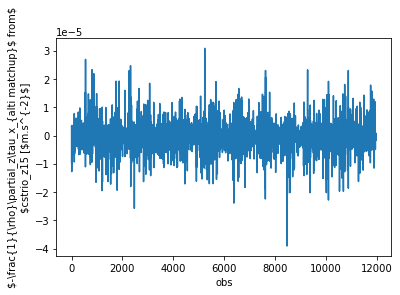

In [103]:
ds_wind.e5_cstrio_z15_alti_wd_x.plot()

In [72]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
